In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Leggi i dati da un file di testo in formato CSV
data = pd.read_csv('LJ_T2.dat', delim_whitespace=True)  # Usa ',' se i dati sono separati da virgole

data
print(data.columns)

Index(['0.0992636944736629', '0.22315721336677719'], dtype='object')


          0         1
0  0.010469 -0.006670
1  0.045762 -0.006473
2  0.088439  0.003850
3  0.146038  0.000812
4  0.209194  0.001166
Int64Index([0, 1], dtype='int64')


NameError: name 'x_t2' is not defined

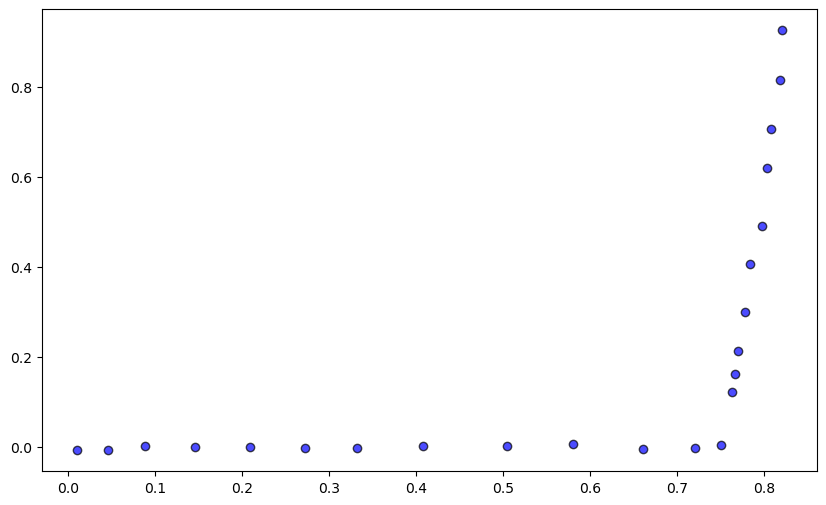

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi i dati dal file di testo senza intestazioni
data = pd.read_csv('LJ_T09.txt', delim_whitespace=True, header=None)

# Visualizza le prime righe del dataframe e gli indici delle colonne
print(data.head())
print(data.columns)

# Converti le colonne in numerico se necessario
data = data.apply(pd.to_numeric, errors='coerce')

# Accedi alle colonne tramite indici numerici
x = data.iloc[:, 0]  # Prima colonna
y = data.iloc[:, 1]  # Seconda colonna

# Crea un diagramma a dispersione
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='blue', marker='o', edgecolor='k', alpha=0.7, label='T=0,9')
plt.scatter(x_t2, y_t2, c='yellow', marker='o', edgecolor='k', alpha=0.7,label='T=2')
plt.xlabel('Density ')  # Etichetta per la prima colonna
plt.ylabel('Pressure')  # Etichetta per la seconda colonna
plt.title('Scatter Plot of Pressure vs Density')
plt.grid(True)
plt.legend()
plt.show()


In [8]:
import matplotlib.pyplot as plt

def read_data(filename):
    densities = []
    pressures = []
    with open(filename, 'r') as file:
        for line in file:
            density, pressure = map(float, line.split())
            densities.append(density)
            pressures.append(pressure)
    return densities, pressures

def plot_data(densities1, pressures1, densities2, pressures2):
    plt.figure(figsize=(10, 6))

    # Plot for t1
    plt.plot(densities1, pressures1, label='Simulazione a t1', color='blue', marker='o')

    # Plot for t2
    plt.plot(densities2, pressures2, label='Simulazione a t2', color='red', marker='x')

    plt.xlabel('Densità')
    plt.ylabel('Pressione')
    plt.title('Grafico della Pressione vs Densità')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    densities1, pressures1 = read_data('results_t1.txt')
    densities2, pressures2 = read_data('results_t2.txt')

    plot_data(densities1, pressures1, densities2, pressures2)

if __name__ == '__main__':
    main()


ValueError: too many values to unpack (expected 2)

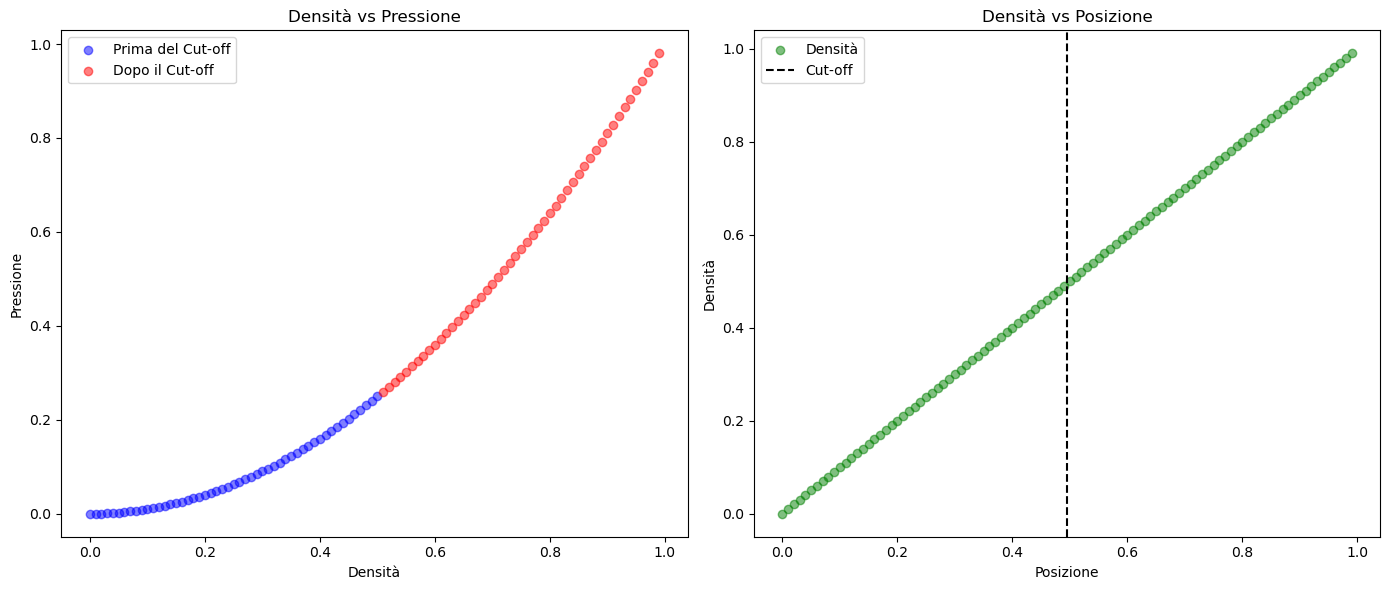

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati dal file
def load_data(filename):
    # Legge il file di dati in un DataFrame pandas
    df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['Density', 'Pressure', 'Position', 'Cutoff'])
    return df

# Crea i grafici
def plot_data(df):
    # Separazione dei dati prima e dopo il cut-off
    cutoff_df = df[df['Cutoff'] == 0]
    post_cutoff_df = df[df['Cutoff'] == 1]
    
    # Creazione dei grafici
    plt.figure(figsize=(14, 6))

    # Grafico per densità vs pressione
    plt.subplot(1, 2, 1)
    plt.scatter(cutoff_df['Density'], cutoff_df['Pressure'], color='blue', label='Prima del Cut-off', alpha=0.5)
    plt.scatter(post_cutoff_df['Density'], post_cutoff_df['Pressure'], color='red', label='Dopo il Cut-off', alpha=0.5)
    plt.xlabel('Densità')
    plt.ylabel('Pressione')
    plt.title('Densità vs Pressione')
    plt.legend()
    
    # Grafico per densità in funzione della posizione
    plt.subplot(1, 2, 2)
    plt.scatter(df['Position'], df['Density'], color='green', alpha=0.5, label='Densità')
    plt.axvline(x=df['Position'].max()/2, color='black', linestyle='--', label='Cut-off')
    plt.xlabel('Posizione')
    plt.ylabel('Densità')
    plt.title('Densità vs Posizione')
    plt.legend()
    
    # Mostra i grafici
    plt.tight_layout()
    plt.show()

# Main
if __name__ == "__main__":
    filename = "results.txt"
    df = load_data(filename)
    plot_data(df)


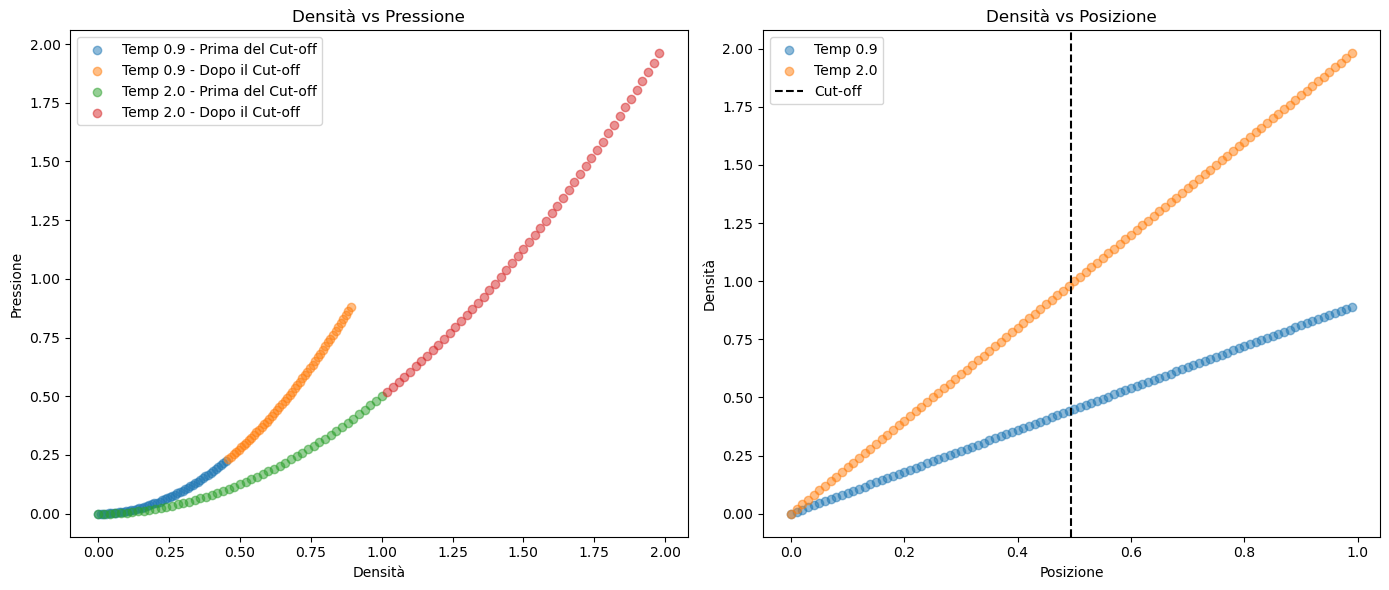

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filenames):
    # Carica i dati da più file in un DataFrame
    data_frames = []
    for filename in filenames:
        df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['Density', 'Pressure', 'Position', 'Cutoff', 'Temperature'])
        data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

def plot_data(df):
    # Separazione dei dati prima e dopo il cut-off
    cutoff_df = df[df['Cutoff'] == 0]
    post_cutoff_df = df[df['Cutoff'] == 1]
    
    # Creazione dei grafici
    plt.figure(figsize=(14, 6))

    # Grafico per densità vs pressione
    plt.subplot(1, 2, 1)
    for temp in df['Temperature'].unique():
        temp_df = df[df['Temperature'] == temp]
        plt.scatter(temp_df[temp_df['Cutoff'] == 0]['Density'], temp_df[temp_df['Cutoff'] == 0]['Pressure'], label=f'Temp {temp} - Prima del Cut-off', alpha=0.5)
        plt.scatter(temp_df[temp_df['Cutoff'] == 1]['Density'], temp_df[temp_df['Cutoff'] == 1]['Pressure'], label=f'Temp {temp} - Dopo il Cut-off', alpha=0.5)
    plt.xlabel('Densità')
    plt.ylabel('Pressione')
    plt.title('Densità vs Pressione')
    plt.legend()
    
    # Grafico per densità in funzione della posizione
    plt.subplot(1, 2, 2)
    for temp in df['Temperature'].unique():
        temp_df = df[df['Temperature'] == temp]
        plt.scatter(temp_df['Position'], temp_df['Density'], label=f'Temp {temp}', alpha=0.5)
    plt.axvline(x=df['Position'].max()/2, color='black', linestyle='--', label='Cut-off')
    plt.xlabel('Posizione')
    plt.ylabel('Densità')
    plt.title('Densità vs Posizione')
    plt.legend()
    
    # Mostra i grafici
    plt.tight_layout()
    plt.show()

# Main
if __name__ == "__main__":
    filenames = ["results_t1.txt", "results_t2.txt"]
    df = load_data(filenames)
    plot_data(df)


In [13]:
# Load the simulated data
P_2 = np.loadtxt("LJ_P_T2_dmax1.txt")
P_09 = np.loadtxt("LJ_P_T09_dmax1.txt")

# Load the reference data from drive
P_2_true = np.loadtxt("LJ_T2.dat")
P_09_true = np.loadtxt("LJ_T09.txt")

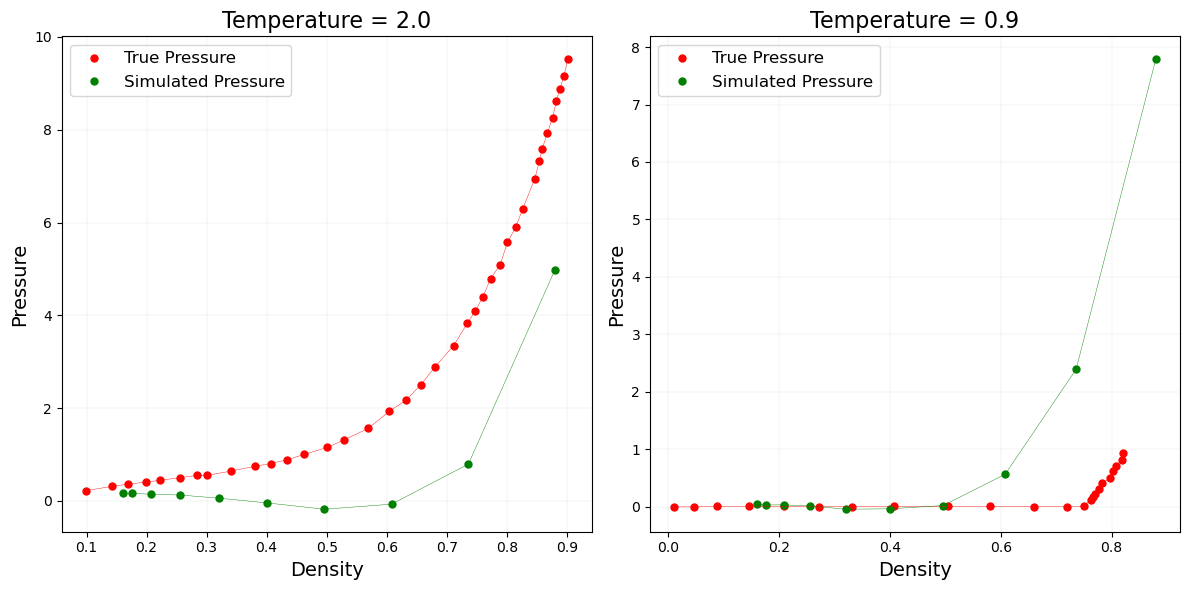

In [17]:
# Plotting
plt.figure(figsize=(12, 6))

# High temperature plot
plt.subplot(1, 2, 1)
plt.plot(P_2_true[:, 0], P_2_true[:, 1], 'o', color='red', label='True Pressure', markersize=5)
plt.plot(P_2[:, 0], P_2[:, 1], 'o', color='green', label='Simulated Pressure', markersize=5)
plt.plot(P_2_true[:, 0], P_2_true[:, 1], color='red', lw=0.3)
plt.plot(P_2[:, 0], P_2[:, 1], color='green', lw=0.3)
plt.title('Temperature = 2.0', fontsize=16)
plt.xlabel('Density', fontsize=14)
plt.ylabel('Pressure', fontsize=14)
plt.grid(lw = 0.1)
plt.legend(fontsize=12)


# Low temperature plot
plt.subplot(1, 2, 2)
plt.plot(P_09_true[:, 0], P_09_true[:, 1], 'o', color='red', label='True Pressure', markersize=5)
plt.plot(P_09[:, 0], P_09[:, 1], 'o', color='green', label='Simulated Pressure', markersize=5)
plt.plot(P_09_true[:, 0], P_09_true[:, 1], color='red', lw=0.3)
plt.plot(P_09[:, 0], P_09[:, 1], color='green', lw=0.3)
plt.title('Temperature = 0.9', fontsize=16)
plt.xlabel('Density', fontsize=14)
plt.ylabel('Pressure', fontsize=14)
plt.grid(lw = 0.1)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()